---
**Chapter 04**
# **Getting started with neural networks**
---

In [26]:
# System Libraries
import tensorflow as tf
import numpy as np
import importlib
import sys

sys.path.append("../")

# User Libraries
from modules import common, chapter_04

# Reload Libraries
importlib.reload(chapter_04)
importlib.reload(common)

# Check GPU
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


---
# **Summary**
---

| Problem | Activation | Last Activation | Last Unit| Loss | Metric |
|--- | --- | --- | --- | --- | --- |
| Binary Classification | ReLU | Sigmoid | 1 | BinaryCrossentropy | BinaryAccuracy |
| Multiclass Single-label Classification | ReLU | Softmax | Classes | CategoricalCrossentropy | CategoricalAccuracy  |
| Multiclass Mutli-label Classification | ReLU | Sigmoid | 1 | BinaryCrossentropy | BinaryAccuracy |
| Scalar Regression | ReLU | None | 1 | MeanSquaredError | MeanAbsoluteError  |

---
# **Binary Classification**
---

**Description**

| Topic | Detail |
| --- | --- |
| Dataset | IMDB: Reviews of movies with a score for each movie |
| Sample | Review (each word has a unique number) |
| Last Activation | Sigmoid (Units=1) |
| Loss | BinaryCrossentropy |
| Optimizer | RMSprop |
| Metric | BinaryAccuracy |
| Units | Output size of layer. Defines how much info can be captured |


**Dataset**

In [2]:
num_words = 10000

# IMDB Dataset
imdb = tf.keras.datasets.imdb
(x_train_og, y_train_og), (x_test_og, y_test_og) = chapter_04.BinaryClassification.dataset(num_words)

# Shuffle Dataset
x_train_og, y_train_og = common.shuffle_data(x_train_og, y_train_og)
x_test_og, y_test_og = common.shuffle_data(x_test_og, y_test_og)

**Exploration**

In [3]:
print(common.valuekey_to_keyvalue(imdb, [999, 19, 1000]))

['cop', 'film', 'secret']


**Encoding**

In [4]:
x_train = common.multihot_encode_data(x_train_og, num_words)
y_train = np.asarray(y_train_og).astype(np.float32)

x_test = common.multihot_encode_data(x_test_og, num_words)
y_test = np.asarray(y_test_og).astype(np.float32)

**Split**

In [5]:
x_train, y_train, x_val, y_val = common.split_data(x_train, y_train, 0.3)

**Training**

In [6]:
epochs = 5
model = chapter_04.BinaryClassification.get_model()
history = chapter_04.BinaryClassification.train(x_train, y_train, x_val, y_val, model, epochs)

2024-01-26 21:15:10.200685: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-26 21:15:10.200707: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-26 21:15:10.200717: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-26 21:15:10.200747: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-26 21:15:10.200764: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-01-26 21:15:11.262576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


**Explore**

Metrics: 
loss, binary_accuracy, val_loss, val_binary_accuracy, 


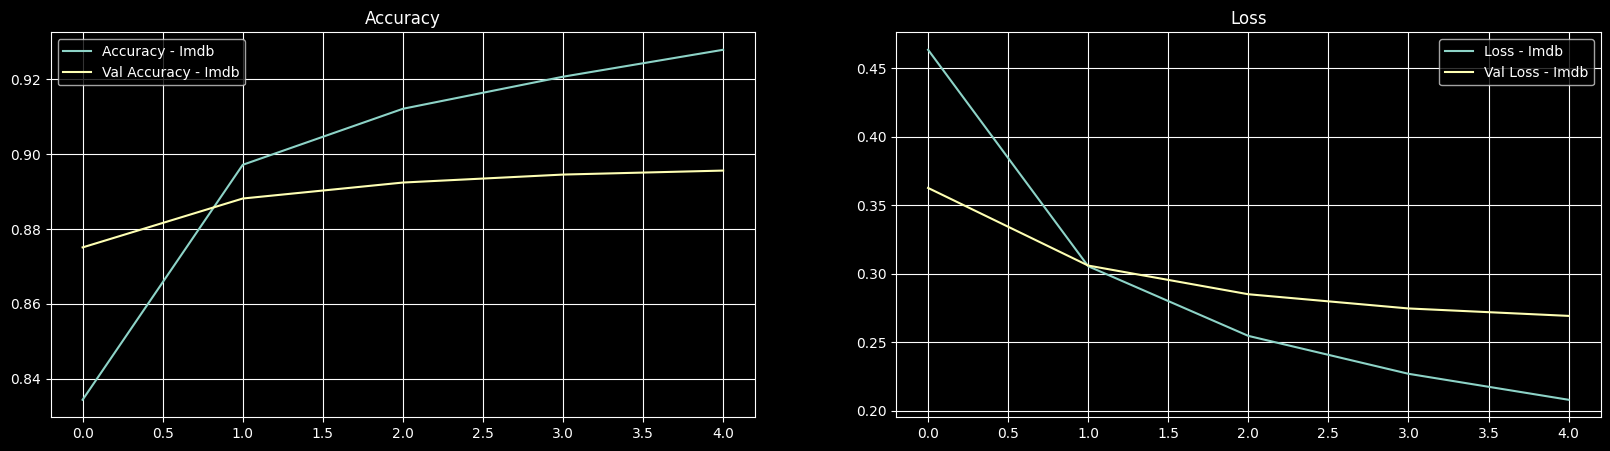

In [7]:
common.plot(data=[history], labels=["Imdb"])

**Evaluation**

In [8]:
evaluation = model.evaluate(x=x_test, y=y_test, verbose=False)
print(model.metrics_names)
print("Loss: ", evaluation[0])
print("Binary Accuracy: ", evaluation[1])

['loss', 'binary_accuracy']
Loss:  0.2767793834209442
Binary Accuracy:  0.8903599977493286


**Prediction**

In [9]:
# Prediction: Probability that a review is positive
y_predict = model.predict(x_test)[:, 0]
print("Ground: ", y_test[:10] > 0.5)
print("Predict: ", y_predict[:10] > 0.5)

782/782 [==============================] - 1s 1ms/step
Ground:  [False  True  True False  True  True False  True False False]
Predict:  [ True  True False False  True  True  True  True False False]


---
# **Muticlass Single-label Classification**
---

**Description**

| Topic | Detail |
|--- | --- |
| Dataset | Reuters: Newswires with a topic for each newswire |
| Sample | Newswire (each word has a unique number) |
| Target | Topics (46) |
| Last Activation | Softmax (Units=46) |
| Loss | CategoricalCrossentropy |
| Optimizer | RMSprop |
| Metric | CategoricalAccuracy |
| Note | Units in hidden layers should **always be more** than last layer |

**Dataset**

In [10]:
num_words = 10000

# Reuters Dataset
reuters = tf.keras.datasets.reuters
(x_train_og, y_train_og), (x_test_og, y_test_og) = chapter_04.MultiClassification.dataset(num_words, reuters)

# Shuffle Dataset
x_train_og, y_train_og = common.shuffle_data(x_train_og, y_train_og)
x_test_og, y_test_og = common.shuffle_data(x_test_og, y_test_og)

**Exploration**

In [11]:
print(common.valuekey_to_keyvalue(reuters, [999, 19, 1000]))

['totalled', 'from', 'limit']


**Encoding**

In [12]:
x_train = common.multihot_encode_data(x_train_og, num_words)
y_train = tf.keras.utils.to_categorical(y_train_og)

x_test = common.multihot_encode_data(x_test_og, num_words)
y_test = tf.keras.utils.to_categorical(y_test_og)

**Alternate Encoding**

In [13]:
"""
- As numpy array
- Loss: SparseCategoricalCrossentropy
"""
y_train_alternate = np.array(y_train_og)
y_test_alternate = np.array(y_test_og)

**Validation**

In [14]:
x_train, y_train, x_val, y_val = common.split_data(x_train, y_train)

**Training**

In [15]:
epochs = 10
model = chapter_04.MultiClassification.get_model()
history = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=False)

**Exploration**

Metrics: 
loss, categorical_accuracy, val_loss, val_categorical_accuracy, 


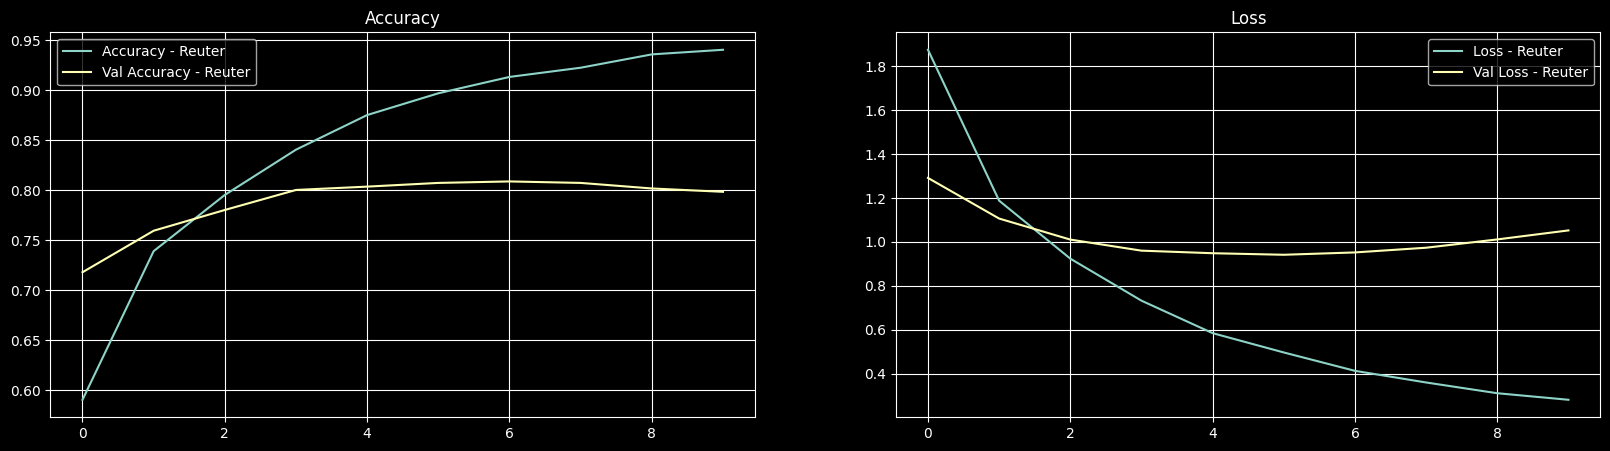

In [16]:
common.plot(data=[history], labels=["Reuter"])

**Evaluation**

In [17]:
chapter_04.MultiClassification.evaluate(x_test, y_test, model)

Evaluation Loss:  1.234912395477295
Evaluation Accuracy:  0.7880676984786987


**Prediction**

In [18]:
chapter_04.MultiClassification.predict(x_test, y_test, model)

71/71 [==============================] - 0s 2ms/step
----------------------------------------------
True: 3
Pred: 3
Confidence: 99%
----------------------------------------------
True: 4
Pred: 0
Confidence: 97%
----------------------------------------------
True: 3
Pred: 3
Confidence: 99%
----------------------------------------------
True: 4
Pred: 4
Confidence: 96%
----------------------------------------------
True: 4
Pred: 19
Confidence: 63%


---
# **Non-Linear Scalar Regression**
---

**Description**

| Topic | Detail |
|--- | --- |
| Dataset | Boston housing prices given features e.g. crime rate, tax rate etc. |
| Sample | Features (13) of a house |
| Target | Price (1) of a house |
| Last Activation | None (Units=1) |
| Loss | MeanSquaredError |
| Optimizer | RMSprop |
| Metric | MeanAbsoluteError |
| Logistic Regression | Not same as Scalar Regression. A type of classification |
| Linear Regression | Type of Scalar Regression |
| Non-uniform scaling | Each feature has a different scale  |
| Feature-wise normalization | Features must be centered around 0 with unit standard deviation |

**Dataset**

In [19]:
# Boston Dataset
(samples, labels), (test_samples, test_labels) = chapter_04.ScalarRegression.dataset()

# Shuffle Dataset
samples, labels = common.shuffle_data(samples, labels)

**Feature-wise Normalization**

In [20]:
samples, test_samples = chapter_04.ScalarRegression.normalize(samples, test_samples)

### <ins>**01. Training with Standard Split**</ins>

**Train / Val Dataset**

In [21]:
train_samples, train_labels, val_samples, val_labels = common.split_data(samples, labels, 0.3)

**Training**

In [22]:
epochs = 120
standard_model = chapter_04.ScalarRegression.get_model()
standard_history = standard_model.fit(
    x=train_samples, y=train_labels, epochs=epochs, validation_data=(val_samples, val_labels), verbose=False
)

**Summary**

- When the dataset is very small, normal train/val division (70% / 30%) does not work good
- K-Fold Cross-Validation is the recommended method


### <ins>**02. Training with K-Fold Cross-Validation**</ins>

  **Explanation**
  - Divide dataset into multiple small folds
  - This way whole dataset is used for training as well as  validation
  - Take the mean after all iterations
  - **Don't shuffle data between folds**

**Example**

In [23]:
"""
Note: Run the snippet in debugger mode with breakpoint in the k-fold function
"""
common.explore_k_fold()

**Training**

In [27]:
num_fold = 10
fold_size = len(samples) // num_fold

# History per fold per epoch
histories = {"loss": [], "val_loss": [], "mean_absolute_error": [], "val_mean_absolute_error": []}

# Training per fold
for fold_count in range(num_fold):
    # Samples using K-Fold
    train_samples, val_samples = common.split_data_kfold(samples, fold_count, fold_size)
    # Labels using K-Fold
    train_labels, val_labels = common.split_data_kfold(labels, fold_count, fold_size)
    # New model per fold
    kfold_model = chapter_04.ScalarRegression.get_model()
    # Training
    history_per_epoch = kfold_model.fit(
        x=train_samples,
        y=train_labels,
        epochs=epochs,
        validation_data=(val_samples, val_labels),
        verbose=False,
    )
    # Save history per epoch per fold
    chapter_04.ScalarRegression.save_history(histories, history_per_epoch.history)

# Mean history of all fold for each epoch
kfold_history = chapter_04.ScalarRegression.mean_history(histories)

### <ins>**03. Comparison of Standard and K-Fold**</ins>

**Exploration**

Metrics: 
loss, mean_absolute_error, val_loss, val_mean_absolute_error, 


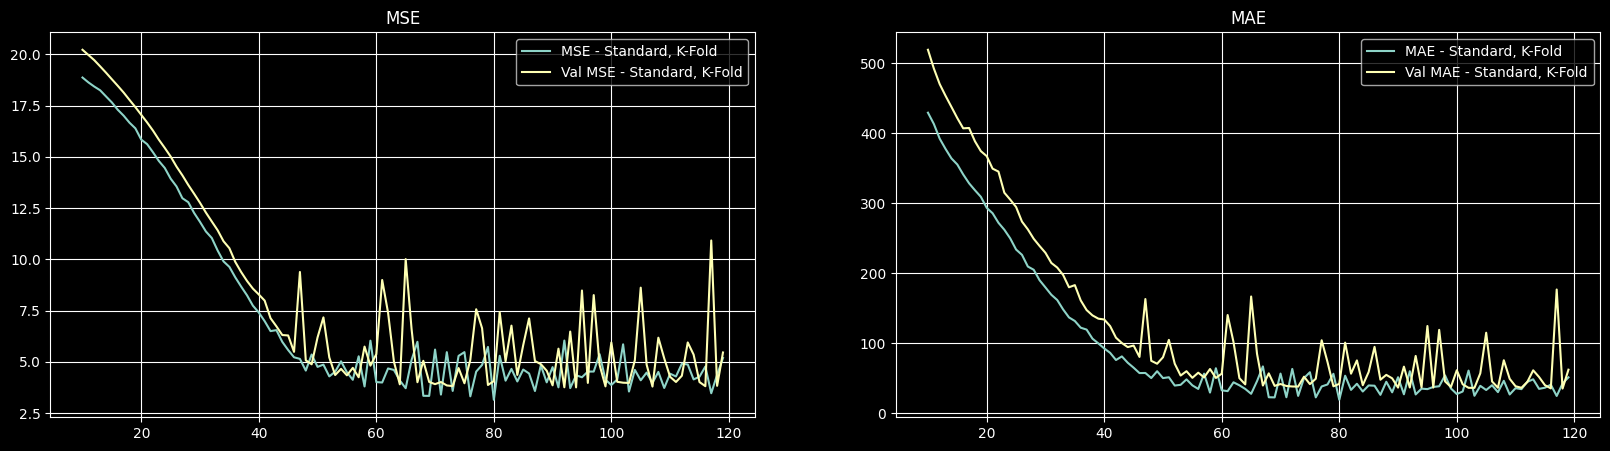

In [28]:
common.plot(
    data=[standard_history, kfold_history],
    labels=["Standard, K-Fold"],
    window_titles=["MSE", "MAE"],
    start_index=10,
)

**Evaluation**

In [29]:
chapter_04.ScalarRegression.get_evaluation(test_samples, test_labels, standard_model, "Standard")
chapter_04.ScalarRegression.get_evaluation(test_samples, test_labels, kfold_model, "K-Fold")

Mean Test MAE (Standard): 4.130027770996094
Mean Test MAE (K-Fold): 11.343994140625


**Prediction**

In [30]:
chapter_04.ScalarRegression.get_prediction(test_samples, test_labels, standard_model, "Standard")
chapter_04.ScalarRegression.get_prediction(test_samples, test_labels, kfold_model, "K-Fold")


-------------------------------------------
Standard
-------------------------------------------

Ground: 7.2 Predict: 3.2979516983032227
Error: 3.9020483016967775

Ground: 18.8 Predict: 19.8149471282959
Error: 1.0149471282958977

Ground: 19.0 Predict: 23.012081146240234
Error: 4.012081146240234


-------------------------------------------
K-Fold
-------------------------------------------

Ground: 7.2 Predict: 30.73609161376953
Error: 23.536091613769532

Ground: 18.8 Predict: 21.677600860595703
Error: 2.8776008605957024

Ground: 19.0 Predict: 17.76656150817871
Error: 1.233438491821289



---
---
---